# IPL Data Analysis - 2 #

## Import necessary libraries ##

In [88]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load data into dataframe ##

In [327]:
ipl_dataframe_match = pd.read_csv('/home/admin-pc/Downloads/sr/matches.csv')
#read matches.csv
ipl_dataframe_delv = pd.read_csv('/home/admin-pc/Downloads/sr/deliveries.csv')
#read deliveries.csv
ipl_dataframe_delv.rename(columns={'match_id':'id'}, inplace=True)
#change col name of deliveries.csv
ipl_dataframe = pd.merge(ipl_dataframe_match, ipl_dataframe_delv,
                         on='id', how='outer')
#merge two df into one

## 1.Most popular Stadium,Venue ##

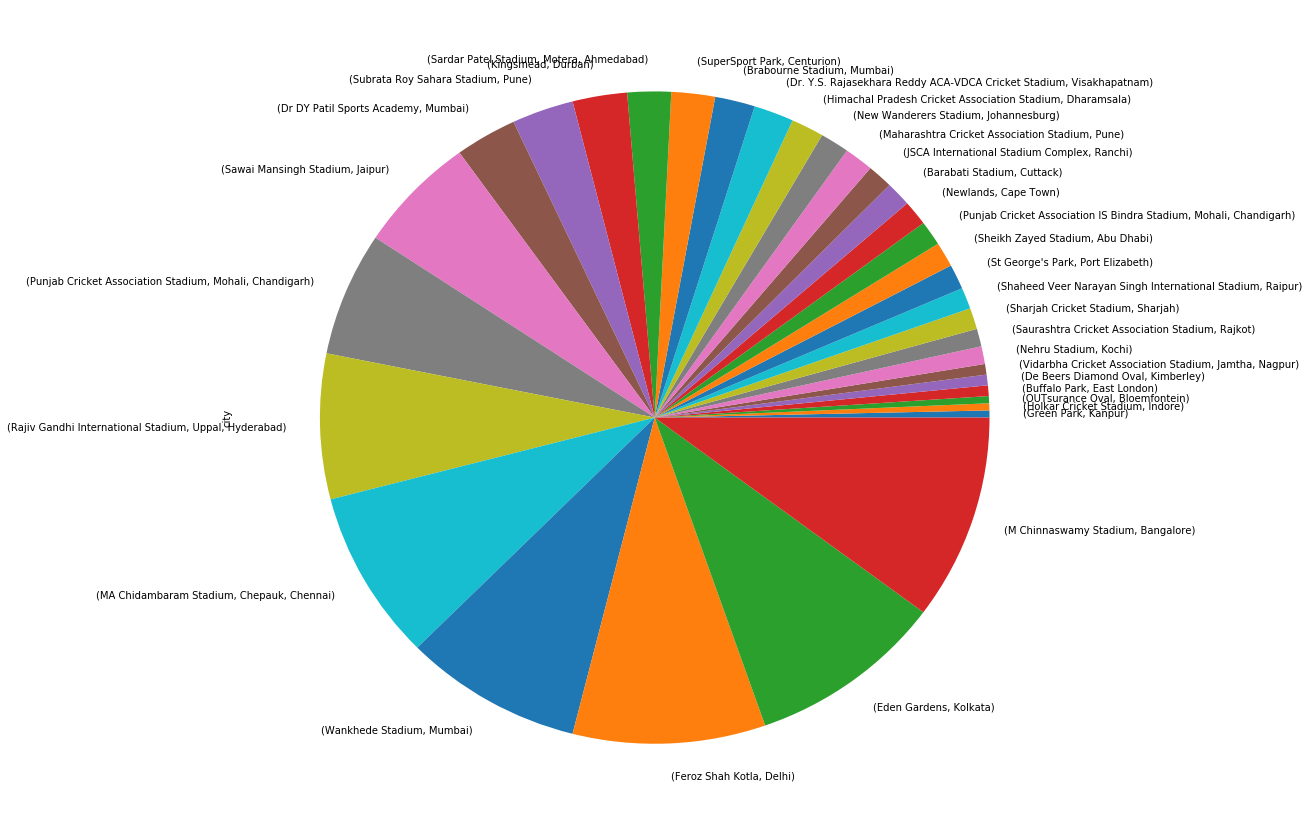

In [368]:
matches_played_in_place = ipl_dataframe_match[['venue','city']]
grouped_venues_df = matches_played_in_place.groupby(['venue']).city.value_counts().sort_values()
grouped_venues_df.plot(kind='pie',
        figsize=(15,15)
        )

## 2.Most toss-winning  team ##

Most toss-winning  team is Mumbai Indians - 74


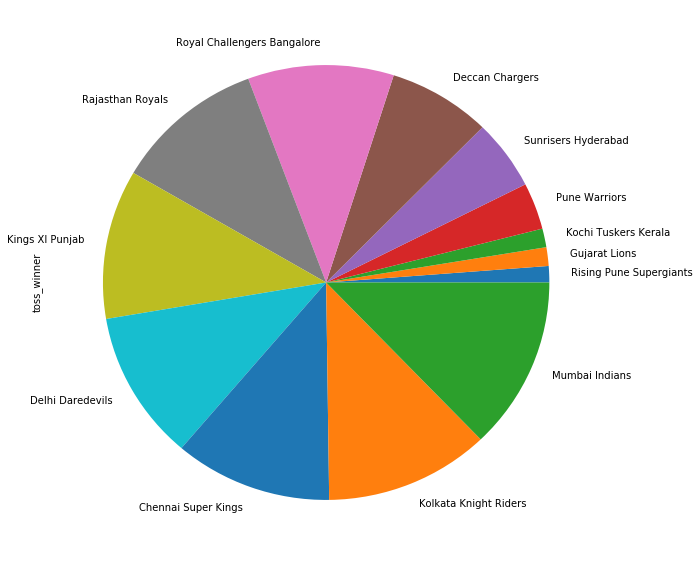

In [340]:
toss_winner_counts = ipl_dataframe_match.toss_winner.value_counts().sort_values()
winner_names = toss_winner_counts.index.get_values()
max_toss_won = toss_winner_counts.max()
print('Most toss-winning  team is '
      + winner_names[-1]
      + ' - '
      + str(max_toss_won)
     )
toss_winner_counts.plot(kind='pie',
                        figsize=(10,10)
                       )

## 3.Favourable venue for a team to win toss ##

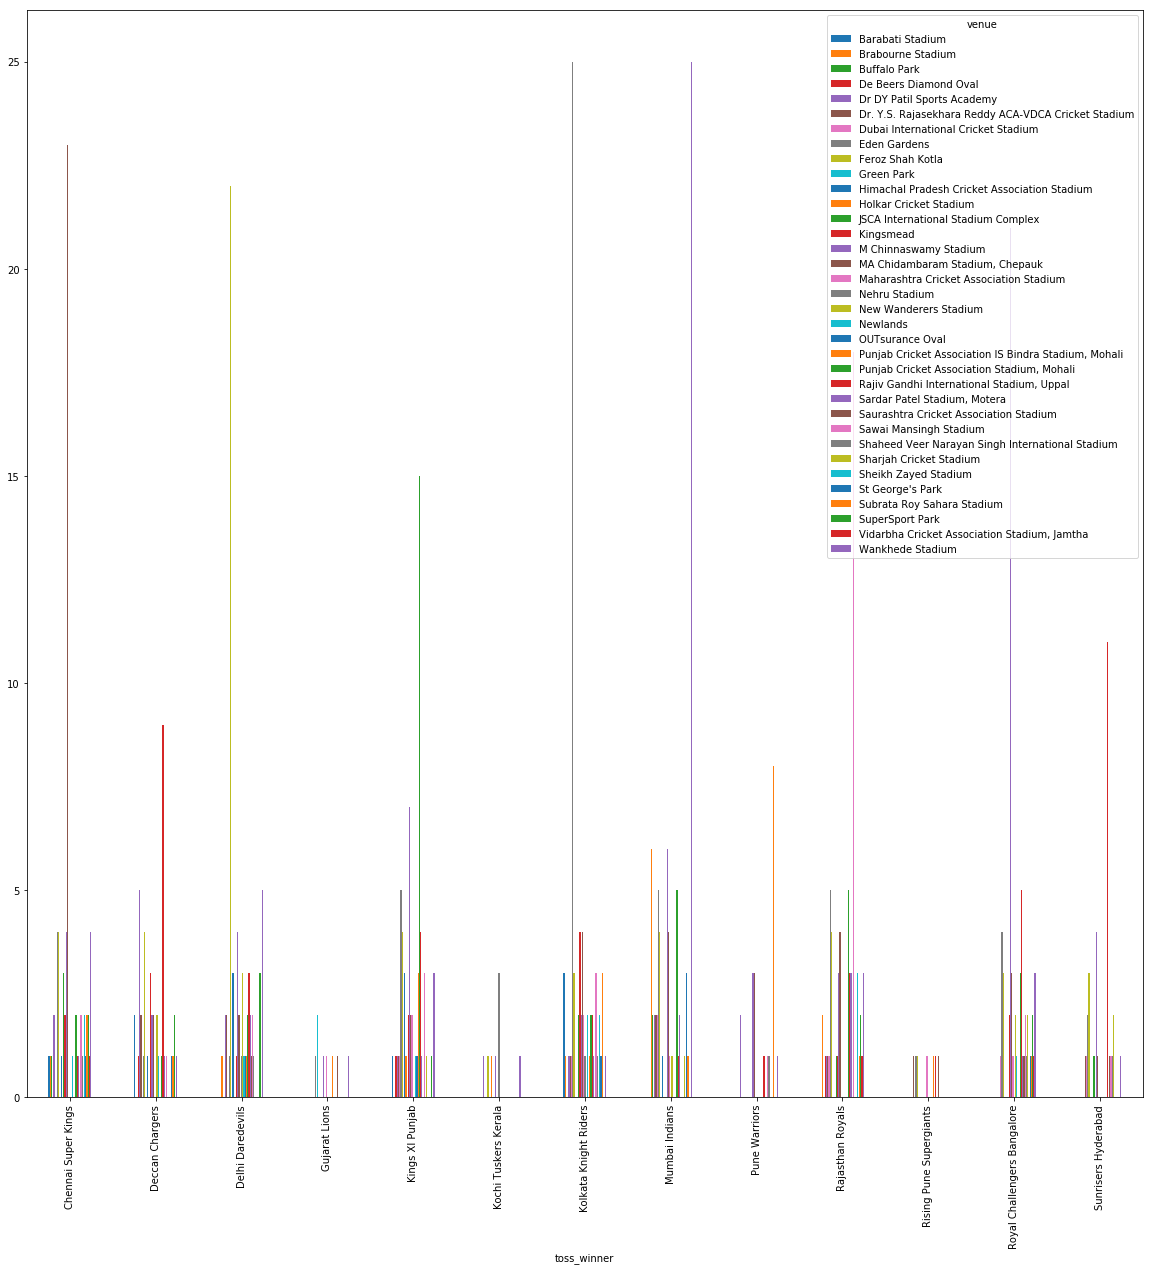

In [161]:
team_fav_venues_for_toss = ipl_dataframe_match[['toss_winner',
                                                'venue']
                                              ].groupby('toss_winner').venue.value_counts().unstack()
team_fav_venues_for_toss.plot(kind='bar',
                              figsize=(20,20)
                             )

## 4.Favourable venue for a team to win match ##


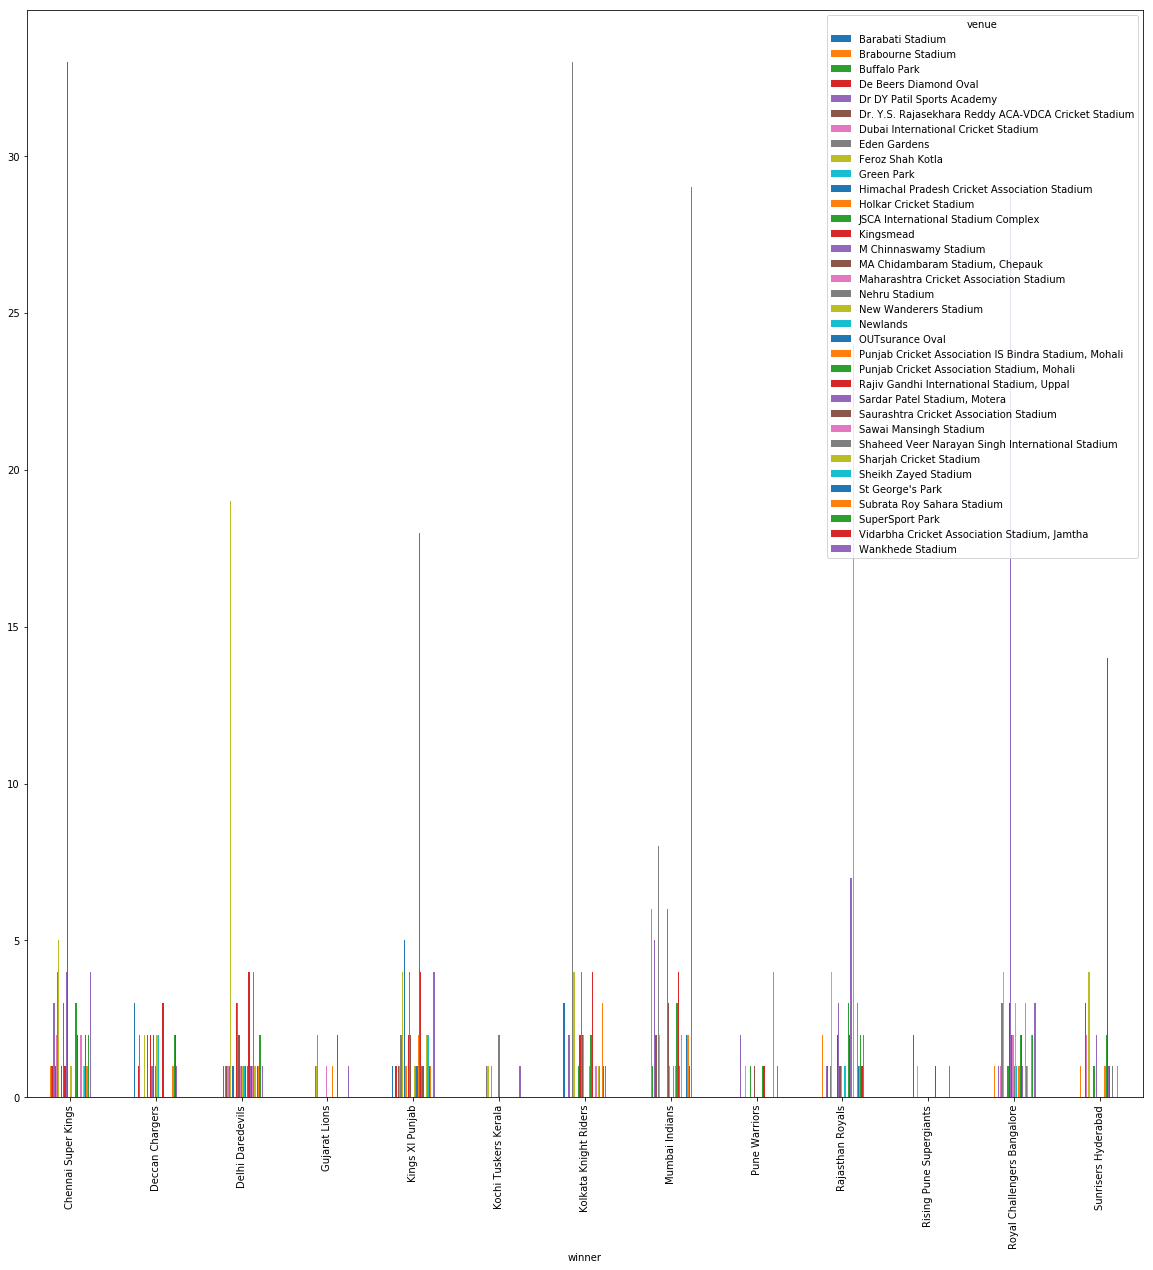

In [162]:
team_fav_venues_for_match = ipl_dataframe_match[['winner',
                                                 'venue']
                                               ].groupby('winner').venue.value_counts().unstack()
team_fav_venues_for_match.plot(kind='bar',
                               figsize=(20,20)
                              )

## 5.Best Team - won max matches ##

Best Team is Mumbai Indians - 80


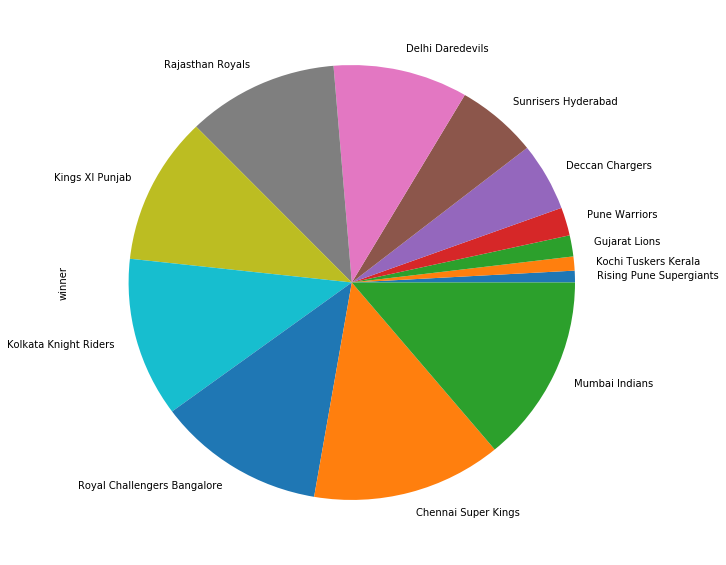

In [339]:
team_wins_counts = ipl_dataframe_match.winner.value_counts().sort_values()
team_names = team_wins_counts.index.get_values()
max_matches_won = team_wins_counts.max()
print('Best Team is '
      + team_names[-1]
      + ' - '
      + str(max_matches_won)
     )
team_wins_counts.plot(kind='pie',
                      figsize=(10,10)
                     )

## 6.Best Player - won max player of match title

Best Player is CH Gayle - 17


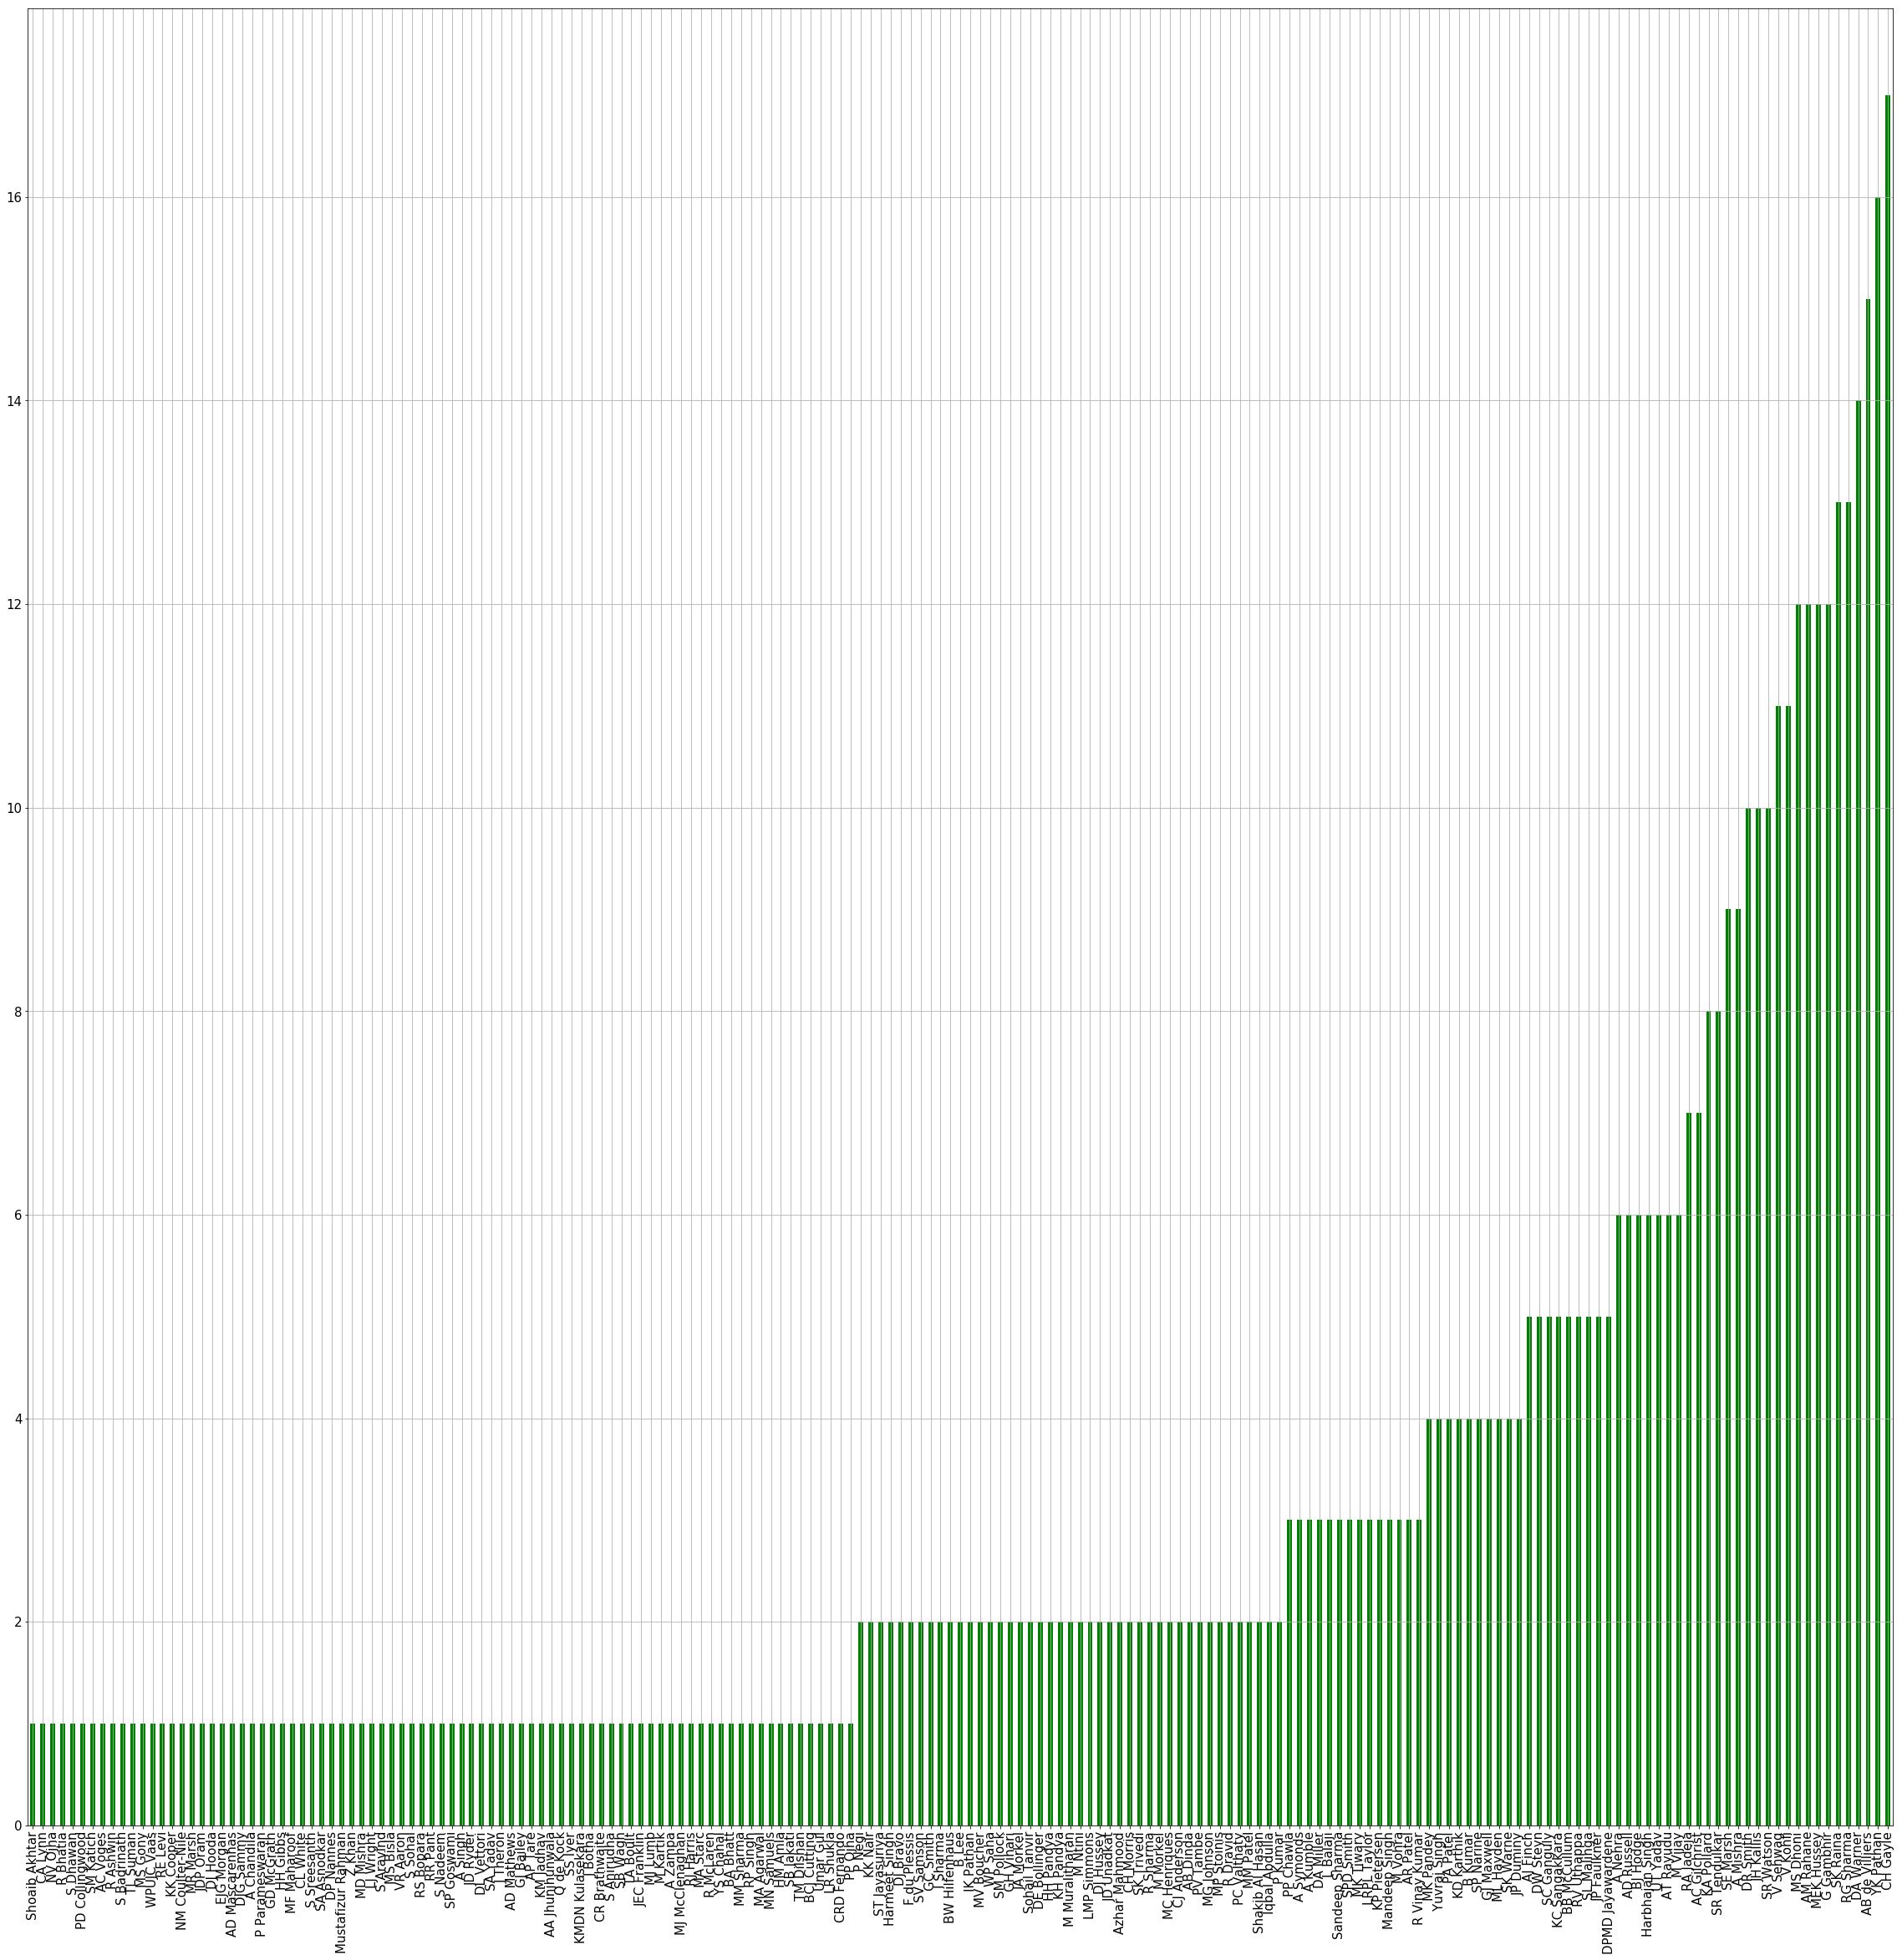

In [326]:
player_wins_counts = ipl_dataframe_match.player_of_match.value_counts().sort_values()
player_names = player_wins_counts.index.get_values()
max_times_player_won = player_wins_counts.max()
print('Best Player is '
      + player_names[-1]
      + ' - ' 
      + str(max_times_player_won)
     )
player_wins_counts.plot(kind='bar',
                        figsize=(40,40),
                        grid=True,
                        color='g',
                        fontsize = 15
                       )

 ## 7. Top 50 Best Batsman - max runs scored

Best Batsman is V Kohli - 3237


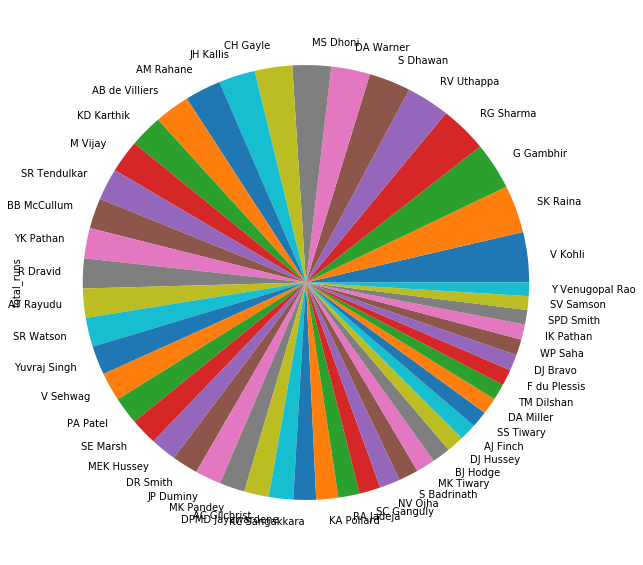

In [337]:
batsman_runs_counts = ipl_dataframe_delv[['total_runs',
                                          'batsman']
                                        ].groupby(['batsman']).total_runs.count().sort_values(ascending=False)
batsman_names = batsman_runs_counts.index.get_values()
max_runs_batsman_scored = batsman_runs_counts.max()
print('Best Batsman is '
      + batsman_names[0]
      + ' - '
      + str(max_runs_batsman_scored)
     )
batsman_runs_counts.head(50).plot(kind='pie',
                                  figsize=(10,10)
                                )

## 8. Top 50 Best bowler - max wickets taken

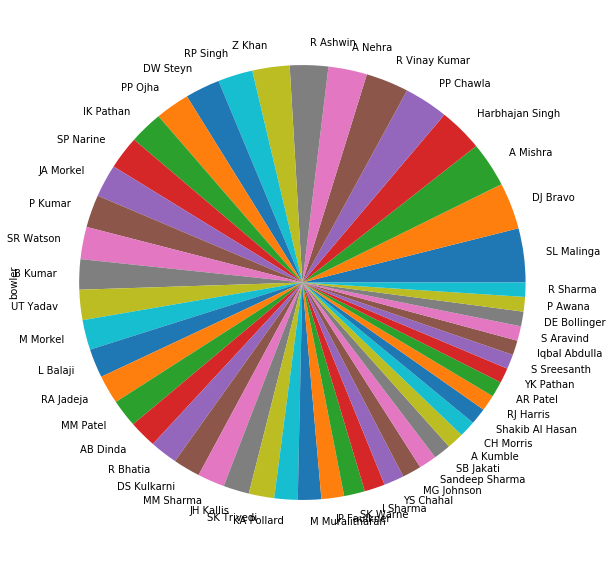

In [338]:
bowler_frame = ipl_dataframe_delv[['dismissal_kind',
                                   'bowler']
                                 ]
bowler_frame_unique = bowler_frame[bowler_frame.dismissal_kind.notnull()]
bowler_counts = bowler_frame_unique.bowler.value_counts().sort_values(ascending=False)
bowler_counts.head(50).plot(kind='pie',
                             figsize=(10,10)
                            )

## 9. Teams who won the toss and the match

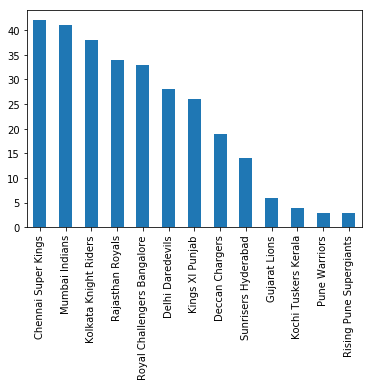

In [351]:
winner_frame = ipl_dataframe_match[['toss_winner','winner']]
teams_win_toss_and_match = winner_frame.loc[winner_frame['winner'] == winner_frame['toss_winner']].winner.value_counts()
teams_win_toss_and_match.plot(kind = 'bar')

## 10.Total matches played v/s Total matches won

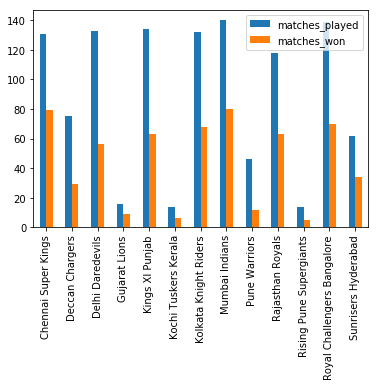

In [396]:
team1_counts = ipl_dataframe_match.team1.value_counts()
team2_counts = ipl_dataframe_match.team2.value_counts()
team_total_matches = team1_counts + team2_counts
team_wins_matches_counts = ipl_dataframe_match.winner.value_counts()
new_df = pd.DataFrame()
new_df['matches_played'] = team_total_matches
new_df['matches_won'] = team_wins_matches_counts
new_df.plot(kind='bar')